In [1]:
import pandas as pd

result_A = pd.read_csv(r"result_df\result_df_step3.csv", encoding='utf-8')
result_A.shape

(200, 10)

In [2]:
result_A.head()

,Unnamed: 0,Actual,Reference,Prediction,BLEU Score,Precisions,Brevity Penalty,Length Ratio,Translation Length,Reference Length
0,0,Also nach Ihnen haben wir gesucht?,"Alors, vous êtes celle que nous recherchions?","""Et nous avons cherché aussi à votre service....",0.000000,"[0.02702702702702703, 0.0, 0.0, 0.0]",1.0,4.111111,37,9
1,1,"Rabbi, ich will nur sicher sein, dass es wirkl...","Rabbi, je veux juste voir si c'est vraiment toi.","Rabbi, je veux seulement être sûr que c'est b...",0.092798,"[0.22580645161290322, 0.13333333333333333, 0.0...",1.0,2.818182,31,11
2,2,Ich rieche keinen Hitler in ihm.,Je ne sens pas Hitler en lui.,Il ne respire pas de Hitler dedans. \n\nThis ...,0.000000,"[0.1111111111111111, 0.0, 0.0, 0.0]",1.0,4.500000,36,8
3,3,"Auf den ersten Schluck des Tages, Freunde!","Au premier verre de la journée, les gars!","À l'heure du premier verre de la journée, ami...",0.135210,"[0.2, 0.14705882352941177, 0.12121212121212122...",1.0,3.500000,35,10
4,4,Sie nehmen keine Rücksicht auf Kinder.,Le fait que vous soyez des enfants ne les arrê...,Ils ne prennent pas de considération pour les...,0.000000,"[0.1388888888888889, 0.0, 0.0, 0.0]",1.0,3.000000,36,12


In [10]:
bleu_A = result_A['BLEU Score'].mean()
ref_len_A = result_A['Reference Length'].mean()
trans_len_A = result_A['Translation Length'].mean()

In [13]:
result_B = pd.read_csv(r"result_df\results_df_B_step5.csv", encoding='utf-8')
result_C = pd.read_csv(r"result_df\results_df_C_step8.csv", encoding='utf-8')
result_D = pd.read_csv(r"result_df\results_df_D_step11.csv", encoding='utf-8')
print(f"""shape of dataframes 
      B{result_B.shape}, 
      C  {result_C.shape} and 
      D {result_D.shape}""")

shape of dataframes 
      B(200, 10), 
      C  (200, 10) and 
      D (200, 10)


In [15]:
bleu_B = result_B['BLEU Score'].mean()
ref_len_B = result_B['Reference Length'].mean()
trans_len_B = result_B['Translation Length'].mean()

In [16]:
bleu_C = result_C['BLEU Score'].mean()
ref_len_C = result_C['Reference Length'].mean()
trans_len_C = result_C['Translation Length'].mean()

In [17]:
bleu_D = result_D['BLEU Score'].mean()
ref_len_D = result_D['Reference Length'].mean()
trans_len_D = result_D['Translation Length'].mean()

In [18]:
final_columns =['Model_name','BLEU','Reference_Length','Predicted_Length']
overall_result_df = pd.DataFrame(columns=final_columns)

In [19]:
overall_result_df.loc[len(overall_result_df)] = ["Model_A", bleu_A, ref_len_A, trans_len_A]
overall_result_df.loc[len(overall_result_df)] = ["Model_B", bleu_B, ref_len_B, trans_len_B]
overall_result_df.loc[len(overall_result_df)] = ["Model_C", bleu_C, ref_len_C, trans_len_C]
overall_result_df.loc[len(overall_result_df)] = ["Model_D", bleu_D, ref_len_D, trans_len_D]


In [20]:
overall_result_df

,Model_name,BLEU,Reference_Length,Predicted_Length
0,Model_A,0.013864,9.4,33.440
1,Model_B,0.008322,9.4,34.795
2,Model_C,0.013787,9.4,35.720
3,Model_D,0.005668,9.4,40.820


##### The values in the above table are average values. The low bleu scores are due to extra text generated in the translation.(Sometimes explanations and sometimes some texts which don't make sense) 
##### Model C and Model A are close in terms of BLEU score.
##### The predicted length is also lower for the base model A. 

Lets plot some graphs

C:\Users\prasa\AppData\Local\Temp\ipykernel_708\1512430390.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=overall_result_df['Model_name'], y=overall_result_df['BLEU'], palette='Blues')


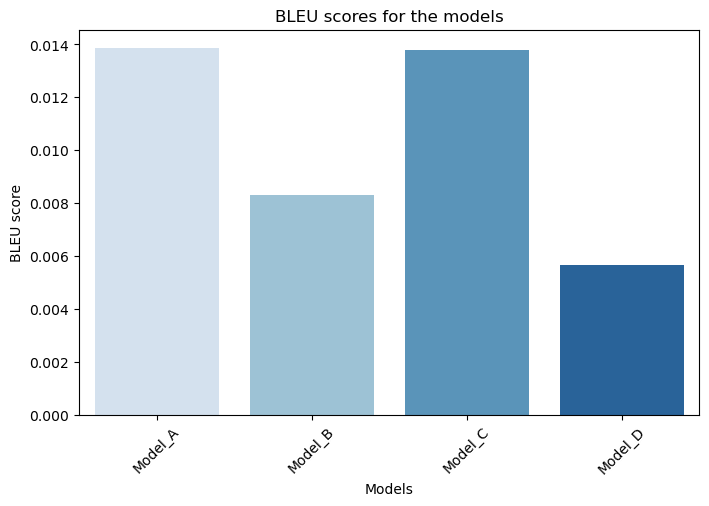

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Models vs Bleu score
plt.figure(figsize=(8, 5))
sns.barplot(x=overall_result_df['Model_name'], y=overall_result_df['BLEU'], palette='Blues')
plt.xlabel("Models")
plt.ylabel("BLEU score")
plt.title("BLEU scores for the models")
plt.xticks(rotation=45)
plt.savefig('chart1',dpi=600,bbox_inches="tight")
plt.show()

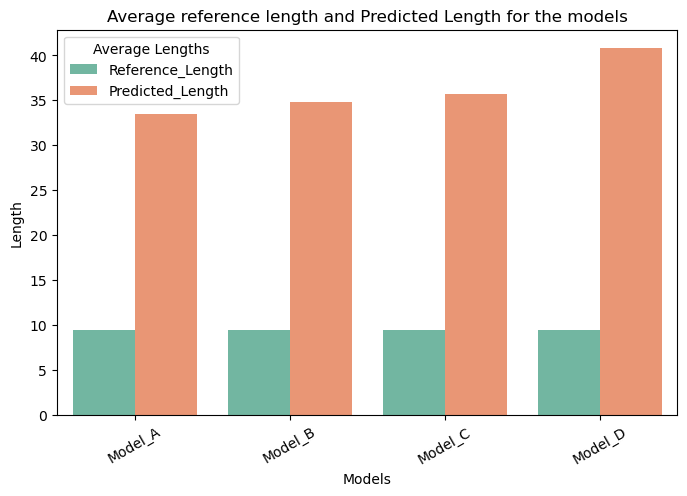

In [35]:
# Plot Column A vs Columns C and D as grouped bars
df_melted = overall_result_df.melt(id_vars=['Model_name'], value_vars=['Reference_Length', 'Predicted_Length'], var_name='Columns', value_name='Values')

plt.figure(figsize=(8, 5))
sns.barplot(x='Model_name', y='Values', hue='Columns', data=df_melted, palette='Set2')
plt.xlabel("Models")
plt.ylabel("Length")
plt.title("Average reference length and Predicted Length for the models")
plt.xticks(rotation=30)
plt.legend(title="Average Lengths")
plt.savefig('chart2',dpi=600, bbox_inches="tight")
plt.show()
